In [2]:
다중 레이블 : 분석 결과가 2개 이상
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

SyntaxError: invalid syntax (<ipython-input-2-72c52fe82c66>, line 1)

In [1]:
import pandas as pd
train_df = pd.read_csv("./clothess/train.csv")
val_df = pd.read_csv("./clothess/val.csv")
test_df = pd.read_csv("./clothess/test.csv")
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothess\blue_pants\251.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,./clothess\green_pants\162.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,./clothess\red_pants\160.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,./clothess\blue_pants\642.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,./clothess\red_pants\249.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   5721 non-null   object 
 1   black   5721 non-null   float64
 2   blue    5721 non-null   float64
 3   brown   5721 non-null   float64
 4   green   5721 non-null   float64
 5   red     5721 non-null   float64
 6   white   5721 non-null   float64
 7   dress   5721 non-null   float64
 8   shirt   5721 non-null   float64
 9   pants   5721 non-null   float64
 10  shorts  5721 non-null   float64
 11  shoes   5721 non-null   float64
dtypes: float64(11), object(1)
memory usage: 536.5+ KB


In [3]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   2452 non-null   object 
 1   black   2452 non-null   float64
 2   blue    2452 non-null   float64
 3   brown   2452 non-null   float64
 4   green   2452 non-null   float64
 5   red     2452 non-null   float64
 6   white   2452 non-null   float64
 7   dress   2452 non-null   float64
 8   shirt   2452 non-null   float64
 9   pants   2452 non-null   float64
 10  shorts  2452 non-null   float64
 11  shoes   2452 non-null   float64
dtypes: float64(11), object(1)
memory usage: 230.0+ KB


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dagen = ImageDataGenerator(rescale = 1./255)
val_dagen = ImageDataGenerator(rescale = 1./255)

# import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout

model = Sequential()
model.add(Flatten(input_shape = (112,112,3))) # 1차원 배열
model.add(Dense(128, activation = 'relu')) # 128개 출력
model.add(Dense(64, activation = 'relu')) # 64개 출력
model.add(Dense(11, activation = 'sigmoid')) # 11개 출력, 다중레이블
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])

In [5]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress', 'shirt', 'pants', 'shorts', 'shoes']
# flow_from_dataframe dataframe 일ㄱ기
# flow_from_directory
train_generator = train_dagen.flow_from_dataframe(
        dataframe = train_df, # 사용할 데이터 프레임
        directory = None, # 이미지 저장폴더
        x_col = 'image', # 학습데이터 저장 컬럼
        y_col = class_col, # 레이블데이터 저장 컬럼
        target_size = (112, 112), #이미지 크기
        color_mode = 'rgb', # 색상 설정
        class_mode = 'raw', #배열
        batch_size = batch_size, # 생성하는 이미지 갯수
        shuffle = True, # 이미지 섞어서 생성
        seed  = 42) # 랜덤 시드
val_generator = val_dagen.flow_from_dataframe(
        dataframe = val_df, # 사용할 데이터 프레임
        directory = None, # 이미지 저장폴더
        x_col = 'image', # 학습데이터 저장 컬럼
        y_col = class_col, # 레이블데이터 저장 컬럼
        target_size = (112, 112), #이미지 크기
        color_mode = 'rgb', # 색상 설정
        class_mode = 'raw', #배열
        batch_size = batch_size, # 생성하는 이미지 갯수
        shuffle = True, # 이미지 섞어서 생성
        seed  = 42) # 랜덤 시드

Found 5721 validated image filenames.
Found 2452 validated image filenames.


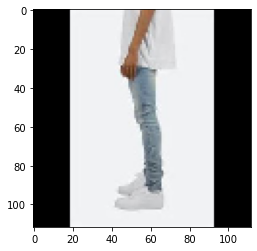

In [6]:
import matplotlib.pylab as plt
batch = next(train_generator)
image, level = batch[0], batch[1]
image[0]
level[1]
plt.imshow(image[0])

In [7]:
# 데이터 갯수/32 나눈 몫
def get_steps(num_samples, batch_size) :
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) +1
    else :
        return num_samples // batch_size
    

In [8]:
# steps_per_epoch : epoch 시 이동 갯수
history = model.fit(train_generator,
                   steps_per_epoch = get_steps(len(train_df), batch_size),
                   validation_data = val_generator,
                   validation_steps = get_steps(len(val_df), batch_size),
                   epochs = 10)

Epoch 1/10
179/179 [==============================] - 10s 56ms/step - loss: 0.3347 - acc: 0.5805 - val_loss: 0.1679 - val_acc: 0.6966
Epoch 2/10
179/179 [==============================] - 8s 46ms/step - loss: 0.1458 - acc: 0.7408 - val_loss: 0.1238 - val_acc: 0.7957
Epoch 3/10
179/179 [==============================] - 9s 48ms/step - loss: 0.1172 - acc: 0.7742 - val_loss: 0.1214 - val_acc: 0.7830
Epoch 4/10
179/179 [==============================] - 8s 47ms/step - loss: 0.1090 - acc: 0.7916 - val_loss: 0.1450 - val_acc: 0.7382
Epoch 5/10
179/179 [==============================] - 8s 46ms/step - loss: 0.0896 - acc: 0.8214 - val_loss: 0.1530 - val_acc: 0.7174
Epoch 6/10
179/179 [==============================] - 8s 46ms/step - loss: 0.0859 - acc: 0.8287 - val_loss: 0.0830 - val_acc: 0.8275
Epoch 7/10
179/179 [==============================] - 8s 46ms/step - loss: 0.0741 - acc: 0.8558 - val_loss: 0.1058 - val_acc: 0.7973
Epoch 8/10
179/179 [==============================] - 8s 46ms/step -

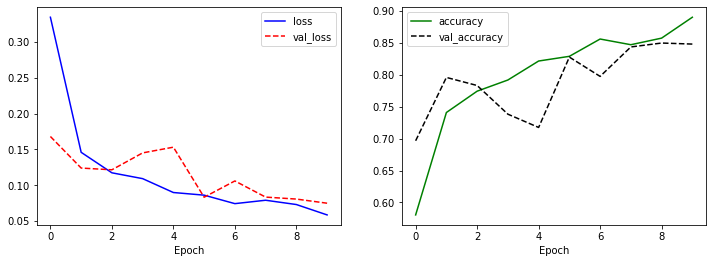

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [10]:
# 테스트 데이터를 이용하여 예측 하기
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_dataframe(
                dataframe = test_df, 
                directory = None,
                x_col = 'image',
                y_col = None,
                target_size = (112, 112),
                color_mode = 'rgb',
                class_mode = None,
                batch_size = batch_size,
                suffle = False)

Found 3503 validated image filenames.


In [11]:
preds = model.predict(test_generator, steps=32)

In [12]:
off = 0
do_preds = preds[off:off+8]
do_preds

array([[3.32533419e-02, 7.11781383e-02, 5.13464212e-04, 1.82812870e-01,
        8.54158352e-05, 7.91194558e-01, 1.21990088e-28, 1.47551075e-29,
        1.93555780e-17, 7.12528839e-29, 1.73372027e-16],
       [6.13263249e-03, 2.04395413e-01, 1.71032548e-03, 3.68385911e-02,
        6.75260671e-05, 6.42114520e-01, 1.42349242e-26, 3.59089307e-29,
        4.28250958e-17, 8.94882424e-27, 7.64378215e-17],
       [8.58788490e-01, 9.29567218e-03, 1.12130190e-04, 5.59631884e-02,
        1.80703537e-05, 5.41556078e-10, 2.68478816e-12, 5.24902760e-15,
        3.93610627e-18, 1.41551403e-14, 2.81184884e-11],
       [5.79097867e-03, 3.95524800e-02, 2.32820511e-02, 1.91599131e-04,
        9.70587730e-01, 3.22788954e-04, 5.19957627e-18, 4.32147078e-16,
        3.17167161e-11, 2.16641580e-17, 3.72485665e-09],
       [9.08219516e-02, 2.23988742e-01, 5.21731377e-03, 5.20364940e-02,
        9.54627991e-04, 2.84431517e-01, 7.32842328e-11, 6.32213336e-12,
        2.34831932e-09, 1.10864234e-11, 1.59157683e-

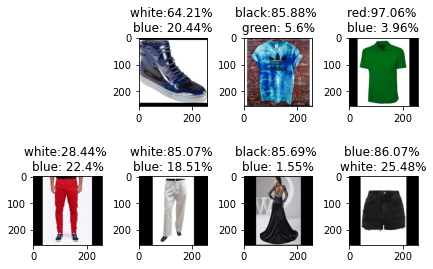

In [13]:
for i, pred in enumerate(do_preds) :
    plt.subplot(2, 4, i+1)
    prob = zip(class_col, list(pred))
    prob = sorted(list(prob), key = lambda z : z[1], reverse = True)[:2]
    image = plt.imread(test_df['image'][i+off])
    plt.imshow(image)
    plt.title(f'{prob[0][0]}:{round(prob[0][1]*100, 2)}% \n{prob[1][0]}: {round(prob[1][1]*100, 2)}%')
    plt.tight_layout()
#     plt.show()

In [14]:
# # CNN을 이용하여 분석하기
model = Sequential([
    Conv2D(input_shape=(112, 112, 3), kernel_size = (3, 3),
          filters=32, padding = 'same', activation = 'relu'),
    Conv2D(kernel_size = (3, 3),
          filters=64, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.5),
    Conv2D(kernel_size = (3, 3),
          filters=128, padding = 'same', activation = 'relu'),
    Conv2D(kernel_size = (3, 3),
          filters=256, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.5),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=256, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=11, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_generator, 
                    steps_per_epoch=get_steps(len(train_df), batch_size),
                    validation_data = val_generator, 
                    validation_steps=get_steps(len(val_df), batch_size),
                    epochs = 10)

Epoch 1/10
179/179 [==============================] - 250s 1s/step - loss: 0.1824 - acc: 0.5745 - val_loss: 0.0724 - val_acc: 0.8254
Epoch 2/10
179/179 [==============================] - 245s 1s/step - loss: 0.0694 - acc: 0.8743 - val_loss: 0.0446 - val_acc: 0.9156
Epoch 3/10
179/179 [==============================] - 242s 1s/step - loss: 0.0479 - acc: 0.9213 - val_loss: 0.0410 - val_acc: 0.9274
Epoch 4/10
179/179 [==============================] - 237s 1s/step - loss: 0.0363 - acc: 0.9428 - val_loss: 0.0423 - val_acc: 0.9396
Epoch 5/10
179/179 [==============================] - 237s 1s/step - loss: 0.0350 - acc: 0.9432 - val_loss: 0.0274 - val_acc: 0.9531
Epoch 6/10
179/179 [==============================] - 237s 1s/step - loss: 0.0292 - acc: 0.9519 - val_loss: 0.0313 - val_acc: 0.9519
Epoch 7/10
179/179 [==============================] - 236s 1s/step - loss: 0.0236 - acc: 0.9640 - val_loss: 0.0267 - val_acc: 0.9625
Epoch 8/10
179/179 [==============================] - 237s 1s/step - 

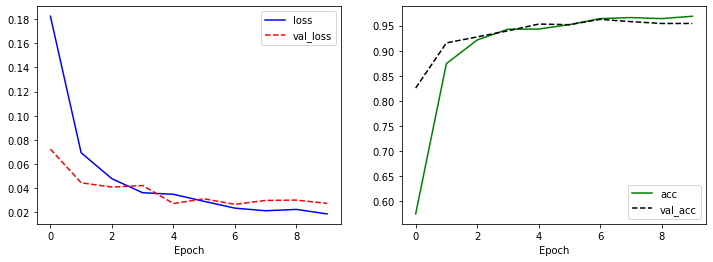

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'g-', label='acc')
plt.plot(history.history['val_acc'], 'k--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
model.evaluate(test_generator)

110/110 [==============================] - 3s 27ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


[0.0, 0.0]